<font color = "white" size = "7"><b> ch10 Pandas(데이터프레임시리즈)</b></font>
* !pip install pandas

# 1절 판다스 패키지
- 데이터 분석을 위한 반드시 알아야 할 패키지, 넘파일를 기반으로 하며, 다른 라이브러리와 잘 통합되어 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임을 제공
- 결측치 처리, 크기변경(열삭제/추가, 행삭제/추가), 데이터 정렬, 데이터분할/병합, 통계처리, 부분데이추출, 파일입출력, 레이블링, 시각화용이
- 

In [1]:
import numpy as np
np.pi

3.141592653589793

In [2]:
import pandas as pd
data = pd.read_json('data/ch10_member1.json', encoding = "CP949")  # Default가 UTF-8
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [3]:
data2 = pd.read_json('data/ch10_member2.json')  # Default가 UTF-8
print(type(data2))
data2

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [4]:
member1 = pd.read_csv('data/ch09_member1.csv', header=None, names = ['name','age', 'email', 'address'], encoding= 'utf-8')  
member1

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


# 2절 데이터프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터프레임 만들기

In [5]:
d = {'name': ['홍길동', '신길동'], 'age': [20,30]}  # 딕셔너리 선언
df = pd.DataFrame(data = d)   
df

,name,age
0,홍길동,20
1,신길동,30


## 2.2 리스트를 이용해서 데이터 프레임 만들기

In [6]:
d = [{'name':'홍길동', 'age':20}, {'name':'신길동', 'age':30}]
df = pd.DataFrame(data = d)   
df

,name,age
0,홍길동,20
1,신길동,30


# 2.3 read_csv()

In [7]:
df = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding="CP949")
df.shape  # 행, 열

(17, 22)

In [8]:
df.head(3)   # 상위 n줄 출력 기본은 5줄

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795


In [9]:
pd.options.display.max_columns # 최대 데이터 프레임의 표현될 수 있는 열 수

20

In [10]:
pd.options.display.max_columns = 22
df.sample(2) # 랜덤으로 n개 출력

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,6577,6778,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037


## 2.4 sklearn, statsmodels, seaborn 등의 라이브러리에서 데이터프레임 불러오기

In [11]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets").data
iris.tail(2)  # 밑에서 n개 출력 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 3절 이름(열, 행) 지정하기

In [12]:
member_df = pd.read_csv('data/ch09_member1.csv', header=None)
member_df

,0,1,2,3
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


In [13]:
# 열이름 지정하기
member_df.columns = ['name', 'age', 'email', 'address']
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


In [14]:
member_df = pd.concat([member_df, member_df])
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구


In [15]:
member_df.index

Index([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype='int64')

In [16]:
member_df.index = ['동', '서', '남', '북', '중', '신']*2

In [17]:
member_df.index

Index(['동', '서', '남', '북', '중', '신', '동', '서', '남', '북', '중', '신'], dtype='object')

In [18]:
member_df.index = range(len(member_df))
member_df.index
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,서울시 강서구
8,박길남,23,gil@hong.com,서울시 강남구
9,김길북,20,kim@hong.com,서울시 강북구


In [19]:
# name 열을 행이름(인덱스 이름)으로 만들기
# member_df2 = member_df.set_index('name') inplace='False',새로운 데이터 프레임 필요
member_df.set_index("name", inplace =True) # 기존 데이터 프레임에 적용
member_df

,age,email,address
name,,,
홍길동,20,hong@hong.com,서울시 강동구
박길서,33,park@hong.com,서울시 강서구
박길남,23,gil@hong.com,서울시 강남구
김길북,20,kim@hong.com,서울시 강북구
신길서,40,park@hong.com,서울시 강서구
신길동,28,park@hong.com,서울시 강서구
홍길동,20,hong@hong.com,서울시 강동구
박길서,33,park@hong.com,서울시 강서구
박길남,23,gil@hong.com,서울시 강남구


In [20]:
member_df.reset_index("name", inplace =True) # 데이터 프레임 원래대로
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,서울시 강서구
8,박길남,23,gil@hong.com,서울시 강남구
9,김길북,20,kim@hong.com,서울시 강북구


In [21]:
# 데이터 프레임의 한열이나 한행을 시리즈라고 함
name = member_df['name'] # 시리즈
print(type(name))
name

<class 'pandas.core.series.Series'>


0     홍길동
1     박길서
2     박길남
3     김길북
4     신길서
5     신길동
6     홍길동
7     박길서
8     박길남
9     김길북
10    신길서
11    신길동
Name: name, dtype: object

In [22]:
member = member_df.loc[0] # 0번 인덱스 행 => 시리즈
print(type(member))
print(member)

<class 'pandas.core.series.Series'>
name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object


In [23]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     12 non-null     object
 1   age      12 non-null     int64 
 2   email    12 non-null     object
 3   address  12 non-null     object
dtypes: int64(1), object(3)
memory usage: 516.0+ bytes


In [24]:
member_df['age'].astype('float64') #열의 타입을 변경

0     20.0
1     33.0
2     23.0
3     20.0
4     40.0
5     28.0
6     20.0
7     33.0
8     23.0
9     20.0
10    40.0
11    28.0
Name: age, dtype: float64

In [25]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     12 non-null     object
 1   age      12 non-null     int64 
 2   email    12 non-null     object
 3   address  12 non-null     object
dtypes: int64(1), object(3)
memory usage: 516.0+ bytes


# 4절. 부분 데이터 조회
- 특정열, 특정행, 특정행의 특정열, 특정조건의 행 모든열, 특정조건의 행의 특정열

## 4.1 단일열 조회

In [26]:
member = pd.read_csv('data/ch09_member2.csv')
member['name']  #시리즈

0    홍길동
1    박길서
2    박길남
3    김길북
4    신길서
5    신길동
Name: name, dtype: object

In [27]:
member['name'].to_frame()  # 시리즈를 데이터 프레임으로 변환

,name
0,홍길동
1,박길서
2,박길남
3,김길북
4,신길서
5,신길동


## 4.2 loc[]을 이용한 이름(열,행)으로 조회
- 단일행, 여러열, 행과 열 동시에 접근
- member.loc[행(슬라이싱), 열(슬라이싱)]
- 무조건 인덱스 index 이름과 column 이름으로만 접근가능

In [28]:
# 단일행
member.loc[1] # 시리즈

name                 박길서
age                   33
email      park@hong.com
address          서울시 강서구
Name: 1, dtype: object

In [29]:
# 여러행
member.loc[1:5] # 1행부터 5행까지

,name,age,email,address
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


In [30]:
member.loc[:,'name':'email']

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,33,park@hong.com
2,박길남,23,gil@hong.com
3,김길북,20,kim@hong.com
4,신길서,40,park@hong.com
5,신길동,28,park@hong.com


In [31]:
# 여러열(name 열과 email 열)
member.loc[:,['name', 'email']]

,name,email
0,홍길동,hong@hong.com
1,박길서,park@hong.com
2,박길남,gil@hong.com
3,김길북,kim@hong.com
4,신길서,park@hong.com
5,신길동,park@hong.com


In [32]:
member.loc[[1,4],['name','email']]

,name,email
1,박길서,park@hong.com
4,신길서,park@hong.com


## 4.3 iloc[]을 이용한 숫자(인덱스)로 조회
- 숫자 인덱스로 슬라이싱 가능, 음수 가능
- member.loc[[1:4],['name':'email']] --> member.iloc[1:4], [1:3]

In [33]:
member.iloc[0:4]

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구


In [34]:
member.iloc[0, 0:3]

name               홍길동
age                 20
email    hong@hong.com
Name: 0, dtype: object

## 4.4 조건으로 조회하기

In [35]:
# 30살 이상의 데이터 출력
member.loc[member['age']>=30] # 인덱스 대신 조건

,name,age,email,address
1,박길서,33,park@hong.com,서울시 강서구
4,신길서,40,park@hong.com,서울시 강서구


In [36]:
address = "서울시 강동구"
address.find('강동구')

4

* 시리즈에 문자함수를 사용하는 방법
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [37]:
member['address'].str.find('강서구')!=-1

0    False
1     True
2    False
3    False
4     True
5     True
Name: address, dtype: bool

In [38]:
# address가 '강서구'인 데이터의 name, age, address를 출력
member.loc[member['address'].str.find('강서구')!=-1, ['name','age','address']]

,name,age,address
1,박길서,33,서울시 강서구
4,신길서,40,서울시 강서구
5,신길동,28,서울시 강서구


In [39]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     6 non-null      object
 1   age      6 non-null      int64 
 2   email    6 non-null      object
 3   address  6 non-null      object
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes


In [40]:
# 결측치 확인
member.isna().sum()

name       0
age        0
email      0
address    0
dtype: int64

In [41]:
# iris
import seaborn as sns
iris_df = sns.load_dataset('iris')
# 0~49 setosa / 50~99 sersicolor / 100~149 virginica
iris_df.loc[100:149].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [42]:
# species가 versicolor인 데이터 상위 3개의 모든열
iris_df[iris_df['species']=='versicolor'].head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor


In [43]:
# species가 versicolor인 데이터의 맨마지막 열을 제외한 데이터
iris_df.loc[iris_df['species']=='versicolor', "sepal_length":"petal_width"].head(3)

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5


In [44]:
# species가 versicolor인 데이터의 맨마지막 열을 제외한 데이터
iris_df.iloc[:, :-1][iris_df['species']=='versicolor'].head(3)

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5


In [45]:
# sepal.length가 6.2 보다 크고, species가 versicolor인 데이터를 출력
iris_df[ (iris_df.species == 'versicolor') & (iris_df.sepal_length>6.2)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
72,6.3,2.5,4.9,1.5,versicolor
74,6.4,2.9,4.3,1.3,versicolor
75,6.6,3.0,4.4,1.4,versicolor


In [46]:
# sepal.length가 6.2 보다 크고, species가 versicolor인 데이터의 sepal_length와 species, sepal_width를 출력
iris_df.loc[ (iris_df.species == 'versicolor') & (iris_df.sepal_length>6.2), 
                        ['sepal_length','sepal_width','species']]

,sepal_length,sepal_width,species
50,7.0,3.2,versicolor
51,6.4,3.2,versicolor
52,6.9,3.1,versicolor
54,6.5,2.8,versicolor
56,6.3,3.3,versicolor
58,6.6,2.9,versicolor
65,6.7,3.1,versicolor
72,6.3,2.5,versicolor
74,6.4,2.9,versicolor
75,6.6,3.0,versicolor


# 5절 데이터 추가 및 삭제

In [47]:
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


In [48]:
import numpy as np
member['major'] = ['컴공','전기','전자','기계','AI',np.nan]
member

,name,age,email,address,major
0,홍길동,20,hong@hong.com,서울시 강동구,컴공
1,박길서,33,park@hong.com,서울시 강서구,전기
2,박길남,23,gil@hong.com,서울시 강남구,전자
3,김길북,20,kim@hong.com,서울시 강북구,기계
4,신길서,40,park@hong.com,서울시 강서구,AI
5,신길동,28,park@hong.com,서울시 강서구,NaN


In [49]:
hobby = pd.DataFrame( {'hobby':['놀기','자기','읽기','먹기','공부','명상']})
hobby

,hobby
0,놀기
1,자기
2,읽기
3,먹기
4,공부
5,명상


In [50]:
member = pd.concat([member, hobby], axis=1)
member

,name,age,email,address,major,hobby
0,홍길동,20,hong@hong.com,서울시 강동구,컴공,놀기
1,박길서,33,park@hong.com,서울시 강서구,전기,자기
2,박길남,23,gil@hong.com,서울시 강남구,전자,읽기
3,김길북,20,kim@hong.com,서울시 강북구,기계,먹기
4,신길서,40,park@hong.com,서울시 강서구,AI,공부
5,신길동,28,park@hong.com,서울시 강서구,NaN,명상


In [51]:
# 열삭제
member.drop(['hobby', 'major'], axis=1, inplace=True)  # inplace = True 하면 member 자체가 바뀜
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서구


In [52]:
# 행삭제
member.drop(4, inplace=True)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
5,신길동,28,park@hong.com,서울시 강서구


In [53]:
member = member.drop(1)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
2,박길남,23,gil@hong.com,서울시 강남구
3,김길북,20,kim@hong.com,서울시 강북구
5,신길동,28,park@hong.com,서울시 강서구


In [54]:
member.index = range(len(member))  # 인덱스 재정렬
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길남,23,gil@hong.com,서울시 강남구
2,김길북,20,kim@hong.com,서울시 강북구
3,신길동,28,park@hong.com,서울시 강서구


# 6절 정렬

In [55]:
member = member.sort_index(ascending=True, axis=0) # 인덱스로 정렬
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길남,23,gil@hong.com,서울시 강남구
2,김길북,20,kim@hong.com,서울시 강북구
3,신길동,28,park@hong.com,서울시 강서구


In [56]:
# 특정열의 값 기준 정렬
member.sort_values(by=['name','age'], inplace=True)
member

,name,age,email,address
2,김길북,20,kim@hong.com,서울시 강북구
1,박길남,23,gil@hong.com,서울시 강남구
3,신길동,28,park@hong.com,서울시 강서구
0,홍길동,20,hong@hong.com,서울시 강동구


# 7절. 기초통계 분석- 
count : NA(결측치)를 제외한 갯수- 
mi- n- 
max- 
su- m
me- an
std : 표- 준편차
var - : 분산
quantile 분위수(1사분위수, 2사분위수, 3- 사분위수)
- corr : 상관관계edian
corr : 상관관계

In [57]:
iris_df.iloc[:,:-1].min(axis=1) # 행마다 모든 열의 최소값, 맨마지막 열은 빼줌

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [58]:
iris_df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [59]:
iris_df.iloc[:, :-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [60]:
iris_df.iloc[:, :-1].std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [61]:
iris_df.describe() # 수치형데이터의 갯수, 평균, 표준편차, 최소 최대, 사분위수

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
iris_df['species'].describe() # 범주형 데이터

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [63]:
iris_df.describe(include='all') # 수치형과 범주형 데이터 모두 describe

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [64]:
iris_df[iris_df['species'].isna()] # species가 결측치인 행을 출력

,sepal_length,sepal_width,petal_length,petal_width,species


# 8절 그룹화

In [65]:
iris_df.groupby(['species']).median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [66]:
iris_group = iris_df.groupby(['species'])
iris_group.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# 연습문제

In [67]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica


In [68]:
# 1. 처음 다섯 개 행만 출력
iris.head()
iris.loc[:5]
iris.iloc[:5]
iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
# 2.Iris 데이터를 독립변수 X와 종속변수 y로 나누세요. 독립변수는 Species 열입니다
# iloc이용
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]
# loc이용
X = iris.loc[:,'sepal_length':'petal_width']
y=iris.loc[:,'species']
# 위의 어떤 방법을 쓰던 y는 Series라서 데이터 프레임으로 바꾸려면 to_frame() 사용
y=iris.loc[:,'species'].to_frame()

In [70]:
X.sample()

,sepal_length,sepal_width,petal_length,petal_width
101,5.8,2.7,5.1,1.9


In [71]:
y.sample()

,species
38,setosa


In [72]:
# 3.iris 데이터에서 처음 50개 행을 빼내서 temp 변수에 저장하세요
temp = iris.head(50)
temp = iris.iloc[:50]
temp = iris[:50]

In [73]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  50 non-null     float64
 1   sepal_width   50 non-null     float64
 2   petal_length  50 non-null     float64
 3   petal_width   50 non-null     float64
 4   species       50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [74]:
# 4. 모든 열에 대하여 요약정보 : temp.describe()는 숫자열만 요약정보 출력됨
temp.describe(include=['float64','object'])
temp.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [75]:
# 5. versicolor 종만
iris_versicolor = iris.loc[iris['species']=='versicolor']
iris_versicolor = iris.loc[iris.species=='versicolor']
iris_versicolor = iris[iris.species=='versicolor']
iris_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [76]:
# 6. X와 y합하기
import pandas as pd
pd.concat([X,y], axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [77]:
#7. 열별 평균값
iris.iloc[:,:-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [78]:
#8. 열들 사이의 상관계수
r = iris.iloc[:,:-1].corr()
r

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

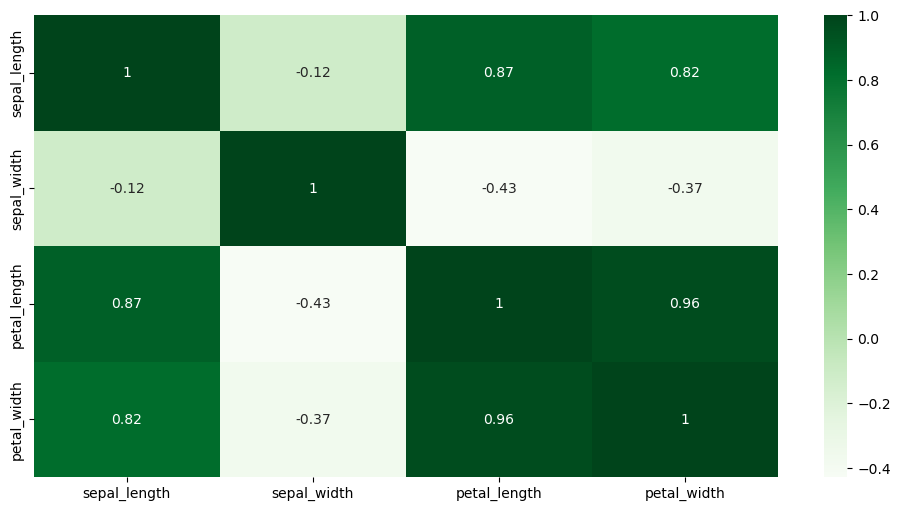

In [79]:
# 상관계수 시각화 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
sns.heatmap(r, annot = True, cmap = 'Greens')  #초록색에 가까울수록 높음


- seaborn 라이브러리 업그레이드 : 아나콘다 프롬프트에서 pip install seaborn --upgrade 
- 업그레이드 확인 : pip show seaborn

In [80]:
# 9. 종별 평균
iris.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026
